In [26]:
import cv2 as cv
from utils import *

## Original Image

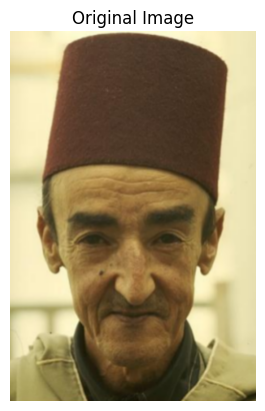

In [27]:
img = read_image('images/image.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
show_image(img, 'Original Image')

## Gray Image

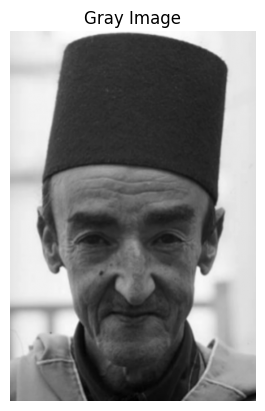

In [28]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_image(gray_img, 'Gray Image')

## Noise Reduction Using Median Filter

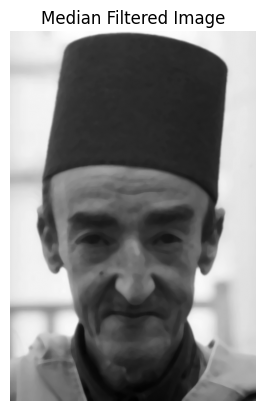

In [29]:
median_filtered_img = cv.medianBlur(gray_img, 9)
show_image(median_filtered_img, 'Median Filtered Image')

## Edge Detection Using Laplacian Filter

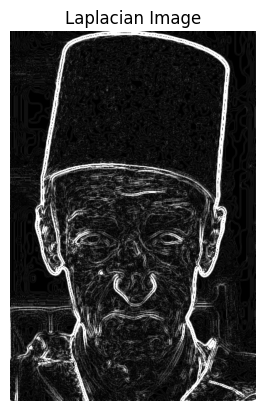

In [30]:
laplacian = cv.Laplacian(median_filtered_img, cv.CV_64F, ksize=5)
laplacian = cv.convertScaleAbs(laplacian)
show_image(laplacian, 'Laplacian Image')